# 2.3 Fundamentals of Visualization Libraries (Part 1)

## This script contains the following:
#### [1. Import Libraries](#import-libraries)
#### [2. Import Data](#import-data)
#### [3. Data Wrangling](#data-wrangling)
#### [4. Time Series - Average NYC Temperatures in 2022](#time-series)
#### [5. Bike Trips per Day](#bike-per-day)
#### [6. Dual Axis Line Chart - Daily Bike Trips + Average Temperatures](#dual-axis)
#### [7. Histogram - Bike Trip Duration](#histogram)
#### [8. Double Chart - Number of Rides by Ride Type and by Member Status](#double-chart)

### 1. Import Libraries<a class="anchor" id="import-libraries"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
from datetime import datetime as dt
import os

### 2. Import Data<a class="anchor" id="import-data"></a>

In [2]:
folderpath = r'/Users/matthewjones/Documents/CareerFoundry/Data Visualization with Python/Achievement 2/NY-CitiBike/2. Data/Processed Data'

df = pd.read_csv(os.path.join(folderpath, 'cleaned_nyc_bike_weather_data.csv'), low_memory=False, encoding="utf-8", index_col = 0)

### 3. Data Wrangling<a class="anchor" id="data-wrangling"></a>

In [3]:
# Check the shape
df.shape

(29838166, 19)

In [4]:
# Check the columns of the imported data
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', 'trip_duration', 'month', 'season',
       'trip_duration_outliers'],
      dtype='object')

In [5]:
# Check the data types
df.dtypes

ride_id                    object
rideable_type              object
started_at                 object
ended_at                   object
start_station_name         object
start_station_id           object
end_station_name           object
end_station_id             object
start_lat                 float64
start_lng                 float64
end_lat                   float64
end_lng                   float64
member_casual              object
date                       object
avgTemp                   float64
trip_duration               int64
month                       int64
season                     object
trip_duration_outliers       bool
dtype: object

In [6]:
# Check the output
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,trip_duration,month,season,trip_duration_outliers
0,9D0DC440CB40CF8E,Electric Bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663657,-73.963014,40.668132,-73.973638,Casual,2022-08-27,27.8,368,8,Summer,False
1,2214991DFBE5C4D7,Electric Bike,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,5382.07,E 11 St & 1 Ave,5746.14,40.717798,-73.993161,40.729538,-73.984267,Casual,2022-08-20,27.9,533,8,Summer,False
2,20C5D469563B6337,Classic Bike,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,5922.07,Grand St & Greene St,5500.02,40.735354,-74.004831,40.721700,-74.002381,Member,2022-08-31,25.6,514,8,Summer,False
3,3E8791885BC189D1,Classic Bike,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,6230.04,Grand Army Plaza & Central Park S,6839.10,40.744219,-73.971212,40.764397,-73.973715,Member,2022-08-02,26.4,711,8,Summer,False
4,8DBCBF98885106CB,Electric Bike,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,6474.11,Ave A & E 14 St,5779.11,40.752052,-73.982115,40.730311,-73.980472,Member,2022-08-25,28.1,651,8,Summer,False


In [7]:
# Set the date to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['date'] = pd.to_datetime(df['date'])

### 4. Time Series - Average NYC Temperature in 2022<a class="anchor" id="time-series"></a>

In [8]:
# Subset the data to reduce memory load
df_temp = df[['date', 'avgTemp']]

In [9]:
# Reduce data to only include one datapoint per day
df_temp_grouped = df_temp.groupby(['date']).mean().reset_index()

In [10]:
# Set the date column to be the index
df_temp_grouped = df_temp_grouped.set_index('date')

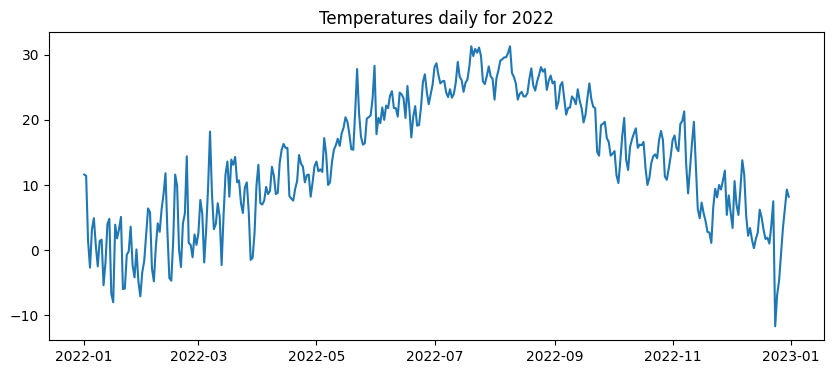

In [11]:
# Plot the time series
plt.figure(figsize=(10,4)) # Create the figure
plt.title('Temperatures daily for 2022') # Set title
plt.plot(df_temp_grouped['avgTemp']) # Define the plot
plt.show()

### 5. Bike Trips per Day<a class="anchor" id="bike-per-day"></a>

In [12]:
# Calculate the daily number of bike rides using groupby
df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)

In [13]:
# Identify the last two values for our merge checks
df_group.tail(2)

,date,bike_rides_daily
363,2022-12-30,62298
364,2022-12-31,31466


In [14]:
# Outer merge df_temp_grouped with df_group
df_merged = df_temp_grouped.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df_merged['_merge'].value_counts(dropna = False))
print("Shape of December 30th is", df[df['date'] == '2022-12-30'].shape) # Check 
print("Shape of December 31st is", df[df['date'] == '2022-12-31'].shape) # Second check 

df_merged = df_merged.set_index('date')

_merge
both          365
left_only       0
right_only      0
Name: count, dtype: int64
Shape of December 30th is (62298, 19)
Shape of December 31st is (31466, 19)


In [15]:
df_merged

,avgTemp,bike_rides_daily,_merge
date,,,
2022-01-01,11.6,20428,both
2022-01-02,11.4,43009,both
2022-01-03,1.4,33189,both
2022-01-04,-2.7,36842,both
2022-01-05,3.2,34230,both
...,...,...,...
2022-12-27,-0.7,33044,both
2022-12-28,3.4,44027,both
2022-12-29,6.4,51674,both


### 6. Dual Axis Line Chart - Daily Bike Trips + Average Temperatures<a class="anchor" id="dual-axis"></a>

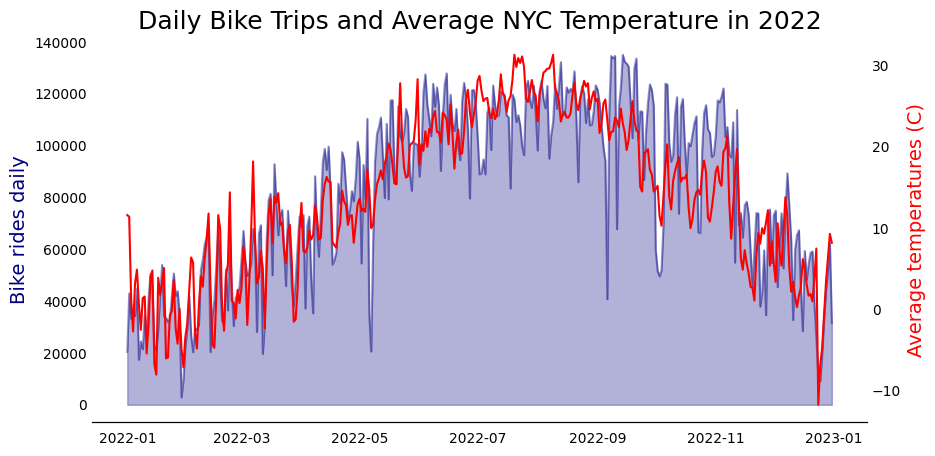

In [16]:
# Create figure and axis objects with subplots() and details
fig, ax = plt.subplots(figsize=(10, 5))


# Make a plot of the bike rides (left y-axis)
ax.plot(df_merged['bike_rides_daily'],
        color='navy', 
        alpha=0.4)
ax.fill_between(df_merged.index, # Fill in the area underneath the plot
                df_merged['bike_rides_daily'], 
                color='navy', 
                alpha=0.3)
#ax.set_xlabel('Date in 2022', fontsize=14) # x-axis label may be extraneous
ax.set_ylabel('Bike rides daily', # y-axis label
              color='navy', 
              fontsize=14) 
ax.spines[['right', 'left', 'top']].set_visible(False) # Eliminate the spines of the plot
ax.tick_params(axis='y', which='both', length=0) # Eliminate axis tick marks
ax.xaxis.set_ticks_position('none')


# Initialize a twin object for two different y-axes on the sample plot
ax2 = ax.twinx()


# Make a plot with the average temperatures (right y-axis)
ax2.plot(df_merged['avgTemp'], 
         color='red')
ax2.set_ylabel('Average temperatures (C)', # y-axis label
               color = "red", 
               fontsize=14)
ax2.spines[['right', 'left', 'top']].set_visible(False) # Eliminate the spines of the plot
ax2.tick_params(axis='y', which='both', length=0) # Eliminate axis tick marks

plt.title('Daily Bike Trips and Average NYC Temperature in 2022', fontsize=18)
plt.show()

#### PROCESS
    I took an OBJECT ORIENTED approach for this visualization because I wanted to first define the axes as objects that I could customize individually. First, I defined the container and the axes. From there, I built two plots: 1) visualized the number of daily bike trips (navy), and 2) visualizaed the average temperature (red). Because I defined the axes before, I could assign the property of dual axis on the axes. This allowed both plots to overlay with appropriately scaled y-axes.
    
    Other design choices were to fill in underneath the line for daily bike trips. This helped to visually differentiate the two plots (because they were very similar). The spines of the figure were also removed to improve the cleanliness of the design.

### 7. Histogram - Bike Trip Duration<a class="anchor" id="histogram"></a>

In [17]:
# Subset the data to reduce memory load
df_duration = df[['ride_id', 'trip_duration', 'member_casual', 'trip_duration_outliers']]

In [18]:
# Check the highest and lowest values in the data
df_duration.sort_values(by='trip_duration', ascending=False)

,ride_id,trip_duration,member_casual,trip_duration_outliers
7951138,12B8BF4BD25AD717,86399,Casual,True
16084947,059BCE0719BA8CD2,86397,Member,True
16092921,DEF7CA86E5F06C4D,86396,Member,True
16097603,139B374357EAFEAE,86396,Member,True
16081747,F47A515ADEA1BBDC,86396,Member,True
...,...,...,...,...
7979796,EBFA242C51457536,8,Casual,False
10340209,94FDFC0FFF31311C,8,Casual,False
11348253,A38EE672DCF218C9,5,Member,False
3295259,37B6A8256BE52DD3,3,Casual,False


In [19]:
# Subsetting the trips with the top 5% in trip duration
no_outliers = df_duration.loc[df_duration['trip_duration_outliers'] == False]

In [20]:
no_outliers.sort_values(by='trip_duration', ascending=False).head()

,ride_id,trip_duration,member_casual,trip_duration_outliers
16338352,210BDA01EC093B1C,2391,Casual,False
26982654,EC8C67FE114E564A,2391,Member,False
22747423,5D169947FA3EA591,2391,Member,False
22310031,9D34F88C1A1C5B88,2391,Casual,False
20856880,CE0F0F2845453432,2391,Casual,False


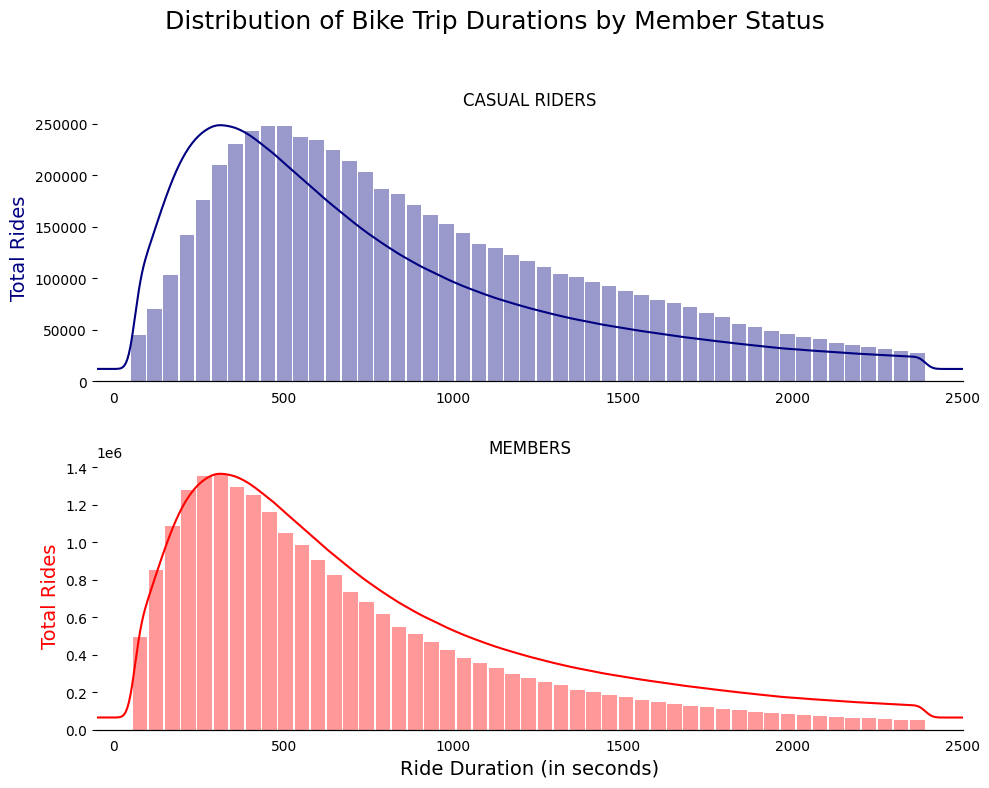

In [21]:
# Create figure and axes objects with subplots() that stack on top of each other
fig, (ax1, ax2) = plt.subplots(2, # Number of plots in figure
                               figsize=(10, 8)) # Make sure there's sufficient spacing between plots

# Make a plot of trip duration frequency for casual riders
ax1 = no_outliers['trip_duration'].loc[no_outliers.member_casual=='Casual'].plot(kind='hist', 
                                                                                 bins=50, 
                                                                                 color='navy', 
                                                                                 alpha=0.4,
                                                                                 rwidth=0.9, # Create a little space between bins
                                                                                 ax=ax1)
ax3 = ax1.twinx() # Initialize a twin object for the top plot to show kde plot in addition to histogram
no_outliers['trip_duration'].plot.kde(ax=ax3, # Create a kde plot using the twin axis (ax3) to ax1
                                      color='navy')
ax1.set_xlim([-50, 2500]) # Manually set x-axis limits
ax1.set_ylabel('Total Rides', # y-axis label
               color='navy', 
               fontsize=14)
ax3.axes.get_yaxis().set_visible(False) # Hide the y-axis for kde plot (density)
ax1.spines[['right', 'left', 'top']].set_visible(False) # Eliminate the spines of the plot
ax3.spines[['right', 'left', 'top']].set_visible(False)
ax1.xaxis.set_ticks_position('none') # Eliminate axis tick marks
ax3.xaxis.set_ticks_position('none')
ax1.set_title('CASUAL RIDERS') # Set title for first plot


# Make a second plot of trip duration frequency for members
ax2 = no_outliers['trip_duration'].loc[no_outliers.member_casual=='Member'].plot(kind='hist', 
                                                                                 bins=50, 
                                                                                 color='red', 
                                                                                 alpha=0.4, 
                                                                                 rwidth=0.9, # Create a little space between bins
                                                                                 ax=ax2)
ax4 = ax2.twinx() # Initialize a twin object for the top plot to show kde plot in addition to histogram
no_outliers['trip_duration'].plot.kde(ax=ax4, # Create a kde plot using the twin axis (ax4) to ax2
                                      color='red')
ax2.set_xlim([-50, 2500]) # Manually set x-axis limits
#ax2.set_yticks(np.arange(0, 25000000, 5000000)) # Manually set y-axis scale 
ax2.set_xlabel('Ride Duration (in seconds)', # x-axis label (being used for both plots)
               fontsize=14)
ax2.set_ylabel('Total Rides', # y-axis label
               color='red', 
               fontsize=14)
ax4.axes.get_yaxis().set_visible(False) # Hide the y-axis for kde plot (density)
ax2.spines[['right', 'left', 'top']].set_visible(False) # Eliminate the spines of the plot
ax4.spines[['right', 'left', 'top']].set_visible(False)
ax2.xaxis.set_ticks_position('none') # Eliminate axis tick marks
ax4.xaxis.set_ticks_position('none')
ax2.set_title('MEMBERS') # Set title for second plot

# Adjust spacing between subplots
plt.tight_layout()

# Fine-tune spacing for shared axes
plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.85)

plt.suptitle('Distribution of Bike Trip Durations by Member Status', # Set overall title for figure
             fontsize = 18)
plt.show()

### 8. Double Chart - Number of Rides by Ride Type and by Member Status<a class="anchor" id="double-chart"></a>

While the Chicago Divvy Bike data has two variables for 'usertype' and 'gender', the New York data does not have either of these two variables. Instead, the binary variables 'rideable_type' and 'member_casual' will be used.

In [22]:
# Subset the data to reduce memory load
df_doublechart = df[['ride_id', 'rideable_type', 'member_casual']]

In [23]:
# Group the data by 'rideable_type'
df_rideable = df_doublechart.groupby(['rideable_type']).count().reset_index()

In [24]:
# Group the data by 'member_casual'
df_membership = df_doublechart.groupby(['member_casual']).count().reset_index()

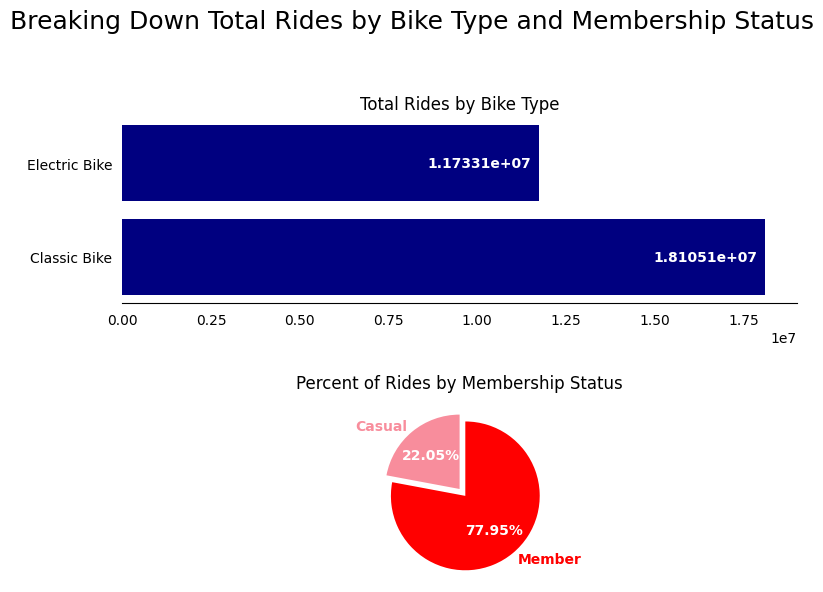

In [25]:
# Create figure and axis objects with subplots() that stack on top of each other
fig, ax = plt.subplots(2, # Number of plots in figure
                       figsize=(8, 6)) # Make sure there's sufficient spacing between plots


# Set the variables to be used in plots
ridetype = df_rideable['rideable_type']
ridetype_cnt = df_rideable['ride_id']
membership = df_membership['member_casual']
membership_cnt = df_membership['ride_id']


# Make a plot of the bike rides by bike type
ax[0].barh(ridetype, 
           ridetype_cnt, 
           color='navy')
ax[0].spines[['right', 'left', 'top']].set_visible(False) # Eliminate the spines of the plot
ax[0].xaxis.set_ticks_position('none') # Eliminate axis tick marks
ax[0].yaxis.set_ticks_position('none') 
ax[0].set_title('Total Rides by Bike Type') # Set title for first plot

# Add labels to bar chart
for i in ax[0].containers:
    ax[0].bar_label(i, fontsize = 10, fontweight=600, padding = -80, color = 'white')

    
# Make a plot of the bike rides by membership status
patches, texts, autotexts = ax[1].pie(membership_cnt, 
          labels=membership, 
          startangle=90, # Change where the pie chart starts
          colors=['#F88D9C', 'red'], 
          autopct='%1.2f%%', # Show percentages
          textprops={'size': 'medium', 'fontweight' : 600}, # Text formatting
          explode=[0, 0.12]) # Add space between pie sections
ax[1].set_title('Percent of Rides by Membership Status') # Set title for second plot

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())


for autotext in autotexts:
    autotext.set_color('white')

# Adjust spacing between subplots
plt.tight_layout()

# Fine-tune spacing for shared axes
plt.subplots_adjust(hspace=0.5, wspace=0.3, top=0.8)

plt.suptitle('Breaking Down Total Rides by Bike Type and Membership Status', # Set overall title for figure
             fontsize=18)
plt.show()